In [1]:
# Import modules

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA


plt.rcParams.update({'font.size': 8})
# plt.rcParams.update({'font.family': "Sans"})
plt.rcParams.update({'mathtext.fontset': "stix"})

np.random.seed(1)

In [2]:
# Prepare the training data

x_ori = np.array([
                  [0,1,1,0,0,0,0,0,0], 
                  [0,0,1,1,0,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0],
                  [0,0,0,0,0,0,1,1,0]
                 ]
                ) 

labels4train = np.random.choice(np.arange(x_ori.shape[0]), size=10000, replace=True)

x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])

In [3]:
# Activation Function

def y_of_x(x):
    return 0.5*(x + np.abs(x))

# Training input weights

def update_w(x, w, limit=False, ltd=True, mature=True, compet=True, rate=0.1):
    
    w_local = np.copy(w)
    
    for idx in range(x.shape[0]):
        
        xt = x[idx]

        noise = np.heaviside(0.1 - np.random.random_sample(w_local.shape[0]), 0)
        
        x_in = xt
        x_in = 0.5*(x_in + np.absolute(x_in))
        
        y_in = np.matmul(w_local, x_in.transpose()) + noise * 0.01
                
        y = y_of_x(y_in)
        
        if ltd:

            delta_w = np.outer(y, xt - 0.25)

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) >= 1.0:
                    w_local[i] /= np.max(w_local[i])
        
        elif limit:

            delta_w = np.outer(y, xt)
            
            if mature:

                for i in range(w_local.shape[0]):
                    if np.sum(w_local[i]) >= 0.1:
                        delta_w[i] = np.zeros_like(delta_w[i])

            if compet:
                
                for i in range(delta_w.shape[1]):
                    delta_w[:,i] -= np.mean(delta_w[:,i])
                    
            for i in range(w_local.shape[1]):
                if np.max(w_local[:,i]) > 1:
                    w_local[:,i] /= np.max(w_local[:,i])

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) < 0:
                    w_local[i] = np.zeros_like(w_local[i])
                    
        else:

            delta_w = np.outer(y, xt)

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) > 1:
                    w_local[i] /= np.max(w_local[i])
                          
    return w_local


In [4]:
# Start trainings

w_SC = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_SC = update_w(x, w_SC, limit=True, ltd=False)
    
    
np.random.seed(1)
w_LTD = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_LTD = update_w(x, w_LTD, limit=False, ltd=True)
    

np.random.seed(1)
w_LTP = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_LTP = update_w(x, w_LTP, limit=False, ltd=False)

In [5]:
# PCA for trainings

pca_SC_fit = PCA(5)
pca_SC_fit.fit(w_SC)
w_SC_pca = pca_SC_fit.transform(w_SC)

pca_LTD_fit = PCA(5)
pca_LTD_fit.fit(w_LTD)
w_LTD_pca = pca_LTD_fit.transform(w_LTD)

pca_LTP_fit = PCA(5)
pca_LTP_fit.fit(w_LTP)
w_LTP_pca = pca_LTP_fit.transform(w_LTP)

In [6]:
big2_w_LTP = np.unique(np.sort(np.argsort(w_LTP, axis=1)[:,-2:]), axis=0)
big2_w_LTD = np.unique(np.sort(np.argsort(w_LTD, axis=1)[:,-2:]), axis=0)
big2_w_SC = np.unique(np.sort(np.argsort(w_SC, axis=1)[:,-2:]), axis=0)

all_big2_combin = []

for ele in big2_w_LTP:
    if tuple(ele) not in all_big2_combin:
        all_big2_combin.append(tuple(ele))

for ele in big2_w_LTD:
    if tuple(ele) not in all_big2_combin:
        all_big2_combin.append(tuple(ele))
        
for ele in big2_w_SC:
    if tuple(ele) not in all_big2_combin:
        all_big2_combin.append(tuple(ele))
        
print(all_big2_combin)

[(2, 6), (1, 2), (6, 7), (2, 3), (5, 6)]


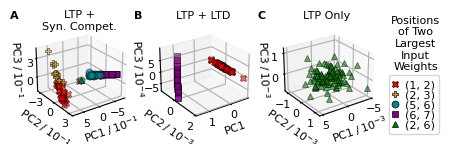

In [7]:
from matplotlib import ticker


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

colors = ["black", "red", "#Daa520", "#Daa520", "green", "#008b8b", "purple", "purple", "#ff00ff"]
symbols = [".","X", "P", "P", ".", "o", "s", "s", "o"]

colors = ["black", "red", "#Daa520", "#Daa520", "green", "#008b8b", "purple", "purple", "#ff00ff"]
symbols = [".","X", "P", "P", ".", "o", "s", "s", "o"]

colors = {
    (1, 2): "red",
    (2, 3): "#Daa520",
    (5, 6): "#008b8b",
    (6, 7): "purple",
    (2, 6): "green"    
}

symbols = {
    (1, 2): "X",
    (2, 3): "P",
    (5, 6): "o",
    (6, 7): "s",
    (2, 6): "^"  
}

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

papersize=(4.33, 1.452)
fig = plt.figure(figsize=papersize)

# ax0 = fig.add_subplot(1, 3, 1)
# ax0.text(-0.6,1.05, "A", va="bottom", weight="bold", transform=ax0.transAxes, fontsize=8)
# ax0.text(1.1,1.05, "LTP + Syn. Compet.", va="bottom", ha="center", transform=ax0.transAxes, fontsize=8)
# ax0.text(3.1,1.05, "B", va="bottom", weight="bold", transform=ax0.transAxes, fontsize=8)
# ax0.text(3.5,1.05, "LTP + LTD", va="bottom", ha="left", transform=ax0.transAxes, fontsize=8)
# ax0.set_xlabel("$PC1_{Compet}$", fontsize=8)
# ax0.set_ylabel("$PC2_{Compet}$", fontsize=8)
# ax0.yaxis.set_label_coords(-0.5,0.4)
# ax0.tick_params(labelsize=8)
# for idx in range(100):
#     ax0.plot(w_SC_pca[idx, 0], w_SC_pca[idx,1], symbols[np.argsort(w_SC, axis=1)[idx,-2]], ms=3, markeredgewidth=0.5,
#              c=colors[np.argsort(w_SC, axis=1)[idx,-2]], markerfacecolor='none')
    
ax1 = fig.add_subplot(1,3,1, projection="3d", zorder=-1)
ax1.text2D(-0.2,1.05, "A", va="bottom", weight="bold", transform=ax1.transAxes, fontsize=8)
ax1.text2D(0.5,1.05, "LTP +\nSyn. Compet.", va="center", ha="center", transform=ax1.transAxes, fontsize=8)

ax1.set_xlabel("$PC1~/~10^{-1}$", fontsize=8, labelpad=-9)
ax1.set_ylabel("$~~~~~~~PC2~/~10^{-1}$", fontsize=8, labelpad=-9)
ax1.set_zlabel("$PC3~/~10^{-1}$", fontsize=8, labelpad=-12)
ax1.set_yticks((-3,0,3))
ax1.set_zticks((-3,0,3))
ax1.set_ylim((-3.5,3.5))
ax1.tick_params(labelsize=8, pad=-1)
ax1.xaxis.set_tick_params(pad=-5)
ax1.yaxis.set_tick_params(pad=-5)
ax1.zaxis.set_tick_params(pad=-5)
for idx in range(100):
    ax1.plot(w_SC_pca[idx, 0]/0.1, w_SC_pca[idx,1]/0.1, w_SC_pca[idx,2]/0.1, symbols[tuple(np.sort(np.argsort(w_SC, axis=1)[idx,-2:]))], alpha=0.6, ms=5, markeredgewidth=0.5,
             c=colors[tuple(np.sort(np.argsort(w_SC, axis=1)[idx,-2:]))],  mec='k')
ax1.view_init(elev=25., azim=55)

ax2 = fig.add_subplot(1,3,2, projection="3d", zorder=-1)
ax2.text2D(-0.2,1.05, "B", va="bottom", weight="bold", transform=ax2.transAxes, fontsize=8)
ax2.text2D(0.5,1.05, "LTP + LTD", va="bottom", ha="center", transform=ax2.transAxes, fontsize=8)

ax2.set_xlabel("$PC1$", fontsize=8, labelpad=-10)
ax2.set_ylabel("$~~~~~~~PC2~/~10^{-3}$", fontsize=8, labelpad=-9)
ax2.set_zlabel("$PC3~/~10^{-4}$", fontsize=8, labelpad=-11)
ax2.tick_params(labelsize=8, pad=-1)
ax2.zaxis.set_tick_params(pad=-4)
ax2.yaxis.set_tick_params(pad=-4.5)
ax2.xaxis.set_tick_params(pad=-5)

for idx in range(100):
    ax2.plot(w_LTD_pca[idx, 0], w_LTD_pca[idx,1]/0.001, w_LTD_pca[idx,2]/0.0001, symbols[tuple(np.sort(np.argsort(w_LTD, axis=1)[idx,-2:]))], alpha=0.6, ms=5,  markeredgewidth=0.5,
             c=colors[tuple(np.sort(np.argsort(w_LTD, axis=1)[idx,-2:]))], mec='k')
ax2.view_init(elev=25., azim=55)

ax3 = fig.add_subplot(1,3,3, projection="3d", zorder=-1)
ax3.text2D(-0.2,1.05, "C", va="bottom", weight="bold", transform=ax3.transAxes, fontsize=8)
ax3.text2D(0.5,1.05, "LTP Only", va="bottom", ha="center", transform=ax3.transAxes, fontsize=8)

ax3.set_xlabel("$PC1~/~10^{-3}$", fontsize=8, labelpad=-9)
ax3.set_ylabel("$~~~~~~~PC2~/~10^{-3}$", fontsize=8, labelpad=-9)
ax3.set_zlabel("$PC3~/~10^{-3}$", fontsize=8, labelpad=-12)
ax3.tick_params(labelsize=8, pad=-1)
ax3.zaxis.set_tick_params(pad=-4)
ax3.yaxis.set_tick_params(pad=-4.5)
ax3.xaxis.set_tick_params(pad=-5)

for idx in range(100):
    ax3.plot(w_LTP_pca[idx, 0]/0.001, w_LTP_pca[idx,1]/0.001, w_LTP_pca[idx,2]/0.001, symbols[tuple(np.sort(np.argsort(w_LTP, axis=1)[idx,-2:]))], alpha=0.6, ms=5,  markeredgewidth=0.5,
             c=colors[tuple(np.sort(np.argsort(w_LTP, axis=1)[idx,-2:]))], mec='k')
ax3.view_init(elev=25., azim=55)

ax3.text2D(1.4,0.55,"Positions\nof Two\nLargest\nInput\nWeights", transform=ax3.transAxes, ha="center", fontsize=8)

plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=1-0.15, 
                    top=1, 
                    wspace=0.25, 
                    hspace=0)
from matplotlib.lines import Line2D
# legend_elements = [
#     Line2D([0], [0], marker=symbols.values()[0], ms=5, lw=0, markeredgewidth=0.5, color=colors.values()[0], label="$p = 0$", mec='k'),
#     Line2D([0], [0], marker=symbols.values()[1], ms=5, lw=0, markeredgewidth=0.5, color=colors.values()[1], label='$p = 1$', mec='k'),
#     Line2D([0], [0], marker=symbols.values()[2], ms=5, lw=0, markeredgewidth=0.5, color=colors.values()[2], label='$p = 2$', mec='k'),
#     Line2D([0], [0], marker=symbols.values()[3], ms=5, lw=0, markeredgewidth=0.5, color=colors.values()[3], label='$p = 3$', mec='k'),
#     Line2D([0], [0], marker=symbols.values()[4], ms=5, lw=0, markeredgewidth=0.5, color=colors.values()[4], label='$p = 3$', mec='k')
# ]


legend_elements = [
    Line2D([0], [0], marker=symbols[key], ms=5, lw=0, markeredgewidth=0.5, color=colors[key], label=key, mec='k')
    for key in symbols.keys()
]
ax3.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.075, 0.55), fontsize=8, 
           borderpad=0.4, labelspacing=0, handlelength=0.2)

fig.savefig("Fig02_1top.pdf")

In [8]:
# Generating activation for comparisons

x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])

x_in = x 
x_in = 0.5*(x_in + np.absolute(x_in))

y_SC_in = np.matmul(w_SC, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_SC_in.shape), 0)

y_SC = y_of_x(y_SC_in+noise).transpose()

y_LTD_in = np.matmul(w_LTD, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_LTD_in.shape), 0)

y_LTD = y_of_x(y_LTD_in+noise).transpose()

y_LTP_in = np.matmul(w_LTP, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_LTP_in.shape), 0)

y_LTP = y_of_x(y_LTP_in+noise).transpose()

In [9]:
pca_fit_y_SC = PCA(5)
pca_fit_y_SC.fit(y_SC)
y_SC_pca= pca_fit_y_SC.transform(y_SC)
pca_fit_y_LTD = PCA(5)
pca_fit_y_LTD.fit(y_LTD)
y_LTD_pca= pca_fit_y_LTD.transform(y_LTD)
pca_fit_y_LTP = PCA(5)
pca_fit_y_LTP.fit(y_LTP)
y_LTP_pca= pca_fit_y_LTP.transform(y_LTP)

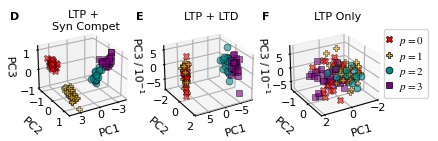

In [10]:
papersize=(4.33, 1.35)

colors2 = ["black", "red", "orange", "green", "purple", "blue", "#008b8b", "#ff00ff"]
symbols = [".","*", "x", "^", "x", "o", "o", "o", "o"]


colors2 = ["red", "#Daa520", "#008b8b", "purple"]
symbols = ["X", "P", "o", "s"]


# colors = ["black", "red", "#Daa520", "#Daa520", "green", "#008b8b", "purple", "purple", "#ff00ff"]
# symbols = [".","X", "P", "P", ".", "o", "s", "s", "o"]

fig = plt.figure(figsize=papersize)

ax0 = fig.add_subplot(1,3,1, projection="3d")
ax0.text2D(-0.2,1.05,"D",weight="bold",transform=ax0.transAxes,fontsize=8)
ax0.text2D(0.55,0.95,"LTP + \nSyn Compet",transform=ax0.transAxes,fontsize=8,ha="center")
ax0.set_xlabel("$PC1$", fontsize=8)
ax0.set_ylabel("$PC2$", fontsize=8)
ax0.set_zlabel("$PC3$", fontsize=8)

for idx in range(100):
    ax0.plot(y_SC_pca[idx, 0], y_SC_pca[idx,1], y_SC_pca[idx,2], symbols[labels4train[idx]], alpha=0.6,  ms=5, markeredgewidth=0.5,
             c=colors2[labels4train[idx]], mec='k')

ax1 = fig.add_subplot(1,3,2, projection="3d")
ax1.text2D(-0.2,1.05,"E",weight="bold",transform=ax1.transAxes,fontsize=8)
ax1.text2D(0.55,1.05,"LTP + LTD",transform=ax1.transAxes,fontsize=8,ha="center")
ax1.set_xlabel("$PC1$", fontsize=8)
ax1.set_ylabel("$PC2$", fontsize=8)
ax1.set_zlabel("$PC3~/~10^{-1}$", fontsize=8)

for idx in range(100):
    ax1.plot(y_LTD_pca[idx, 0], y_LTD_pca[idx,1], y_LTD_pca[idx,2]/0.1, symbols[labels4train[idx]], alpha=0.6,  ms=5, markeredgewidth=0.5,
             c=colors2[labels4train[idx]], mec='k')

ax2 = fig.add_subplot(1,3,3, projection="3d")
ax2.text2D(-0.2,1.05,"F",weight="bold",transform=ax2.transAxes,fontsize=8)
ax2.text2D(0.55,1.05,"LTP Only",transform=ax2.transAxes,fontsize=8,ha="center")
ax2.set_xlabel("$PC1$", fontsize=8)
ax2.set_ylabel("$PC2$", fontsize=8)
ax2.set_zlabel("$PC3~/~10^{-1}$", fontsize=8)

for idx in range(100):
    ax2.plot(y_LTP_pca[idx, 0], y_LTP_pca[idx,1], y_LTP_pca[idx,2]/0.1, symbols[labels4train[idx]], alpha=0.6,  ms=5, markeredgewidth=0.5,
             c=colors2[labels4train[idx]], mec='k')

xlim=[0,0]
ylim=[0,0]
zlim=[0,0]



for ax in [ax0, ax1, ax2]:
#     xlim = [np.minimum(xlim[0], ax.get_xlim()[0]), np.maximum(xlim[1], ax.get_xlim()[1])]
#     ylim = [np.minimum(ylim[0], ax.get_ylim()[0]), np.maximum(ylim[1], ax.get_ylim()[1])]
#     zlim = [np.minimum(zlim[0], ax.get_zlim()[0]), np.maximum(zlim[1], ax.get_zlim()[1])]
    ax.view_init(elev=25., azim=60)
    ax.tick_params(axis='both', which='major', pad=-4)
    
    ax.zaxis.set_tick_params(pad=-3)
    ax.yaxis.set_tick_params(pad=-4.5)
    ax.xaxis.set_tick_params(pad=-7)
    ax.xaxis.labelpad = -10
    ax.yaxis.labelpad = -7
    ax.zaxis.labelpad = -9
# #    ax.xaxis.set_ticks([-3,0,3])
    ax.tick_params(labelsize=8)

ax0.xaxis.set_ticks([-3,0,3])
ax1.yaxis.set_ticks([-2,0,2])

# ax0.set_xlim(xlim)
# ax0.set_ylim(ylim)
# ax0.set_zlim(zlim)
# ax1.set_xlim(xlim)
# ax1.set_ylim(ylim)
# ax1.set_zlim(zlim)
# ax2.set_xlim(xlim)
# ax2.set_ylim(ylim)
# ax2.set_zlim(zlim)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=symbols[0], lw=0, ms=5, markeredgewidth=0.5, color=colors2[0], label='$\it p = 0$', mec='k'),
    Line2D([0], [0], marker=symbols[1], lw=0, ms=5, markeredgewidth=0.5, color=colors2[1], label='$\it p = 1$', mec='k'),
    Line2D([0], [0], marker=symbols[2], lw=0, ms=5, markeredgewidth=0.5, color=colors2[2], label='$\it p = 2$', mec='k'),
    Line2D([0], [0], marker=symbols[3], lw=0, ms=5, markeredgewidth=0.5, color=colors2[3], label='$\it p = 3$', mec='k')
]
ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.95, 1.), fontsize=8, 
           borderpad=0.4, labelspacing=0.2, handlelength=0.2)


plt.subplots_adjust(left=0.055,
                    bottom=0.1, 
                    right=0.87, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

fig.savefig("Fig02_2mid.pdf")

In [11]:
# Training Weights without mature nor competition

np.random.seed(1)
w_noMature = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_noMature = update_w(x, w_noMature, limit=True, ltd=False, mature=False)
    

np.random.seed(1)
w_noCompet = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])
    w_noCompet = update_w(x, w_noCompet, limit=True, ltd=False, compet=False)

In [12]:
# Neuronal activation without mature nor competition

y_noMature_in = np.matmul(w_noMature, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_noMature_in.shape), 0)

y_noMature = y_of_x(y_noMature_in+noise).transpose()

y_noCompet_in = np.matmul(w_noCompet, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_noCompet_in.shape), 0)

y_noCompet = y_of_x(y_noCompet_in+noise).transpose()

In [13]:
# Calculating the corresponding PCA

pca_fit_y_noMature = PCA(5)
pca_fit_y_noMature.fit(y_noMature)
y_noMature_pca= pca_fit_y_noMature.transform(y_noMature)
pca_fit_y_noCompet = PCA(5)
pca_fit_y_noCompet.fit(y_noCompet)
y_noCompet_pca= pca_fit_y_noCompet.transform(y_noCompet)

In [14]:
def mahalanobis(x, y):
    Vi = np.linalg.inv(np.cov(np.concatenate((x, y)).transpose()))
    diff = np.mean(x, axis=0) - np.mean(y, axis=0)
    return np.dot(diff, np.matmul(Vi, diff))

dist_LTP = [(i,j,mahalanobis(y_LTP[labels4train==i], y_LTP[labels4train==j])) for i in range(4) for j in range(4) if i < j]

print(dist_LTP)

dist_LTD = [(i,j,mahalanobis(y_LTD[labels4train==i], y_LTD[labels4train==j])) for i in range(4) for j in range(4) if i < j]

print(dist_LTD)

dist_SC = [(i,j,mahalanobis(y_SC[labels4train==i], y_SC[labels4train==j])) for i in range(4) for j in range(4) if i < j]

print(dist_SC)

[(0, 1, 1.7928145359089969), (0, 2, 1.3672218512395582), (0, 3, 0.7405350643807662), (1, 2, 0.19873128242267588), (1, 3, 2.582177171171975), (2, 3, 2.2952033859199643)]
[(0, 1, 1.5353887793757848), (0, 2, 3.9934845845484723), (0, 3, 3.992905554333495), (1, 2, 3.9920406943992517), (1, 3, 3.9919452265305093), (2, 3, 2.716719746234264)]
[(0, 1, 3.5509683173538784), (0, 2, 3.9798370484236436), (0, 3, 3.978136834685495), (1, 2, 3.9756328354733075), (1, 3, 3.9741585958297443), (2, 3, 3.5393433848082)]


/tmp/ipykernel_273/1748666517.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(("LTP\n+SC","LTP\n+LTD","LTP"))


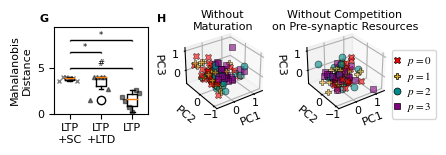

In [43]:
papersize=(4.33, 1.44)

colors2 = ["black", "red", "orange", "green", "#008b8b", "blue", "purple", "#ff00ff"]
symbols = [".","+", "x", "^", "x", "o", "o", "o", "o"]

colors2 = ["black", "red", "orange", "green", "purple", "blue", "#008b8b", "#ff00ff"]
symbols = [".","+", "x", "^", "x", "o", "o", "o", "o"]

colors2 = ["red", "#Daa520", "#008b8b", "purple"]
symbols = ["X", "P", "o", "s"]

fig = plt.figure(figsize=papersize)

ax0 = fig.add_subplot(1,3,1)
ax0.text(-0.15,1.1,"G",weight="bold",transform=ax0.transAxes,fontsize=8,va="center")
ax0.set_xlabel("", fontsize=8)
ax0.set_ylabel("Mahalanobis\nDistance", fontsize=8)
ax0.set_ylim((0,9.5))
ax0.tick_params(labelsize=8)
ax0.set_xticklabels(("LTP\n+SC","LTP\n+LTD","LTP"))

def draw_sign_bar(ax, x0, x1, y):
    ax.arrow(x0,y,x1-x0,0, head_width=0, head_length=0)
    ax.arrow(x0,y,0,-0.1, head_width=0, head_length=0)
    ax.arrow(x1,y,0,-0.1, head_width=0, head_length=0)
    
draw_sign_bar(ax0, 1,3,5)
ax0.text(2,5,"#",ha="center",va="bottom", fontsize=6)
    
draw_sign_bar(ax0, 1,2,6.8)
ax0.text(1.5,6.8,"*",ha="center",va="bottom", fontsize=6)

draw_sign_bar(ax0, 1,3,8.1)
ax0.text(2,8.1,"*",ha="center",va="bottom", fontsize=6)

ax0.boxplot([[data[2] for data in dist_SC], [data[2] for data in dist_LTD], [data[2] for data in dist_LTP]])

idx = 0
for data in dist_SC:
    ax0.plot(1+(idx-3)/9, data[2], "x", ms=3, color="k", alpha=0.5)
    idx += 1
    
idx = 0
for data in dist_LTD:
    ax0.plot(2+(idx-3)/9, data[2], "^", ms=3, color="k", alpha=0.5)
    idx += 1
    
idx = 0
for data in dist_LTP:
    ax0.plot(3+(idx-3)/9, data[2], "s", ms=3, color="k", alpha=0.5)
    idx += 1

ax1 = fig.add_subplot(1,3,2, projection="3d")
ax1.text2D(1.1,1.1,"H",weight="bold",transform=ax0.transAxes,fontsize=8,va="center")
ax1.text2D(0.5,1.075,"Without\nMaturation",transform=ax1.transAxes,fontsize=8,ha="center",va="center")
ax1.set_xlabel("$PC1$", fontsize=8)
ax1.set_ylabel("$PC2$", fontsize=8)
ax1.set_zlabel("$PC3$", fontsize=8)

for idx in range(100):
    ax1.plot(y_noMature_pca[idx, 0], y_noMature_pca[idx,1], y_noMature_pca[idx,2], symbols[labels4train[idx]], alpha=0.6, ms=5, markeredgewidth=0.5, 
             c=colors2[labels4train[idx]], mec='k')

ax2 = fig.add_subplot(1,3,3, projection="3d")
#ax2.text2D(-0.35,1.05,"H",weight="bold",transform=ax2.transAxes,fontsize=8,va="center")
ax2.text2D(0.5,1.075,"Without Competition\non Pre-synaptic Resources",transform=ax2.transAxes,fontsize=8,ha="center",va="center")
ax2.set_xlabel("$PC1$", fontsize=8)
ax2.set_ylabel("$PC2$", fontsize=8)
ax2.set_zlabel("$PC3$", fontsize=8)

for idx in range(100):
    ax2.plot(y_noCompet_pca[idx, 0], y_noCompet_pca[idx,1], y_noCompet_pca[idx,2], symbols[labels4train[idx]], alpha=0.6, ms=5, markeredgewidth=0.5, 
             c=colors2[labels4train[idx]], mec='k')

xlim=[0,0]
ylim=[0,0]
zlim=[0,0]

for ax in [ax1, ax2]:
    xlim = [np.minimum(xlim[0], ax.get_xlim()[0]), np.maximum(xlim[1], ax.get_xlim()[1])]
    ylim = [np.minimum(ylim[0], ax.get_ylim()[0]), np.maximum(ylim[1], ax.get_ylim()[1])]
    zlim = [np.minimum(zlim[0], ax.get_zlim()[0]), np.maximum(zlim[1], ax.get_zlim()[1])]
    ax.tick_params(axis='x', which='major', pad=-6,labelsize=8)
    ax.tick_params(axis='y', which='major', pad=-6,labelsize=8)
    ax.tick_params(axis='z', which='major', pad=-4,labelsize=8)
    ax.xaxis.labelpad = -11
    ax.yaxis.labelpad = -10
    ax.zaxis.labelpad = -10
#    ax.set_yticks([0,1])

for ax in [ax1, ax2]:
    ax.view_init(elev=30., azim=235)

for ax in [ax1, ax2]:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=symbols[0], lw=0, color=colors2[0], ms=5, markeredgewidth=0.5, label='$\it p = 0$', mec='k'),
    Line2D([0], [0], marker=symbols[1], lw=0, color=colors2[1], ms=5, markeredgewidth=0.5, label='$\it p = 1$', mec='k'),
    Line2D([0], [0], marker=symbols[2], lw=0, color=colors2[2], ms=5, markeredgewidth=0.5, label='$\it p = 2$', mec='k'),
    Line2D([0], [0], marker=symbols[3], lw=0, color=colors2[3], ms=5, markeredgewidth=0.5, label='$\it p = 3$', mec='k')
]
ax2.legend(handles=legend_elements, loc='upper center', ncol =1, bbox_to_anchor=(1.3, 0.8), fontsize=8, 
           borderpad=0.4, labelspacing=0.2, handlelength=0.2)

#fig.tight_layout(pad=0.2, w_pad=0.5, h_pad=0.1)

plt.subplots_adjust(left=0.11,
                    bottom=0.25, 
                    right=0.89, 
                    top=0.85, 
                    wspace=0.3, 
                    hspace=0.15)


fig.savefig("Fig02_3low.pdf")

In [16]:

x_ori_sep = np.array([
                  [0,1,1,0,0,0,0,0,0], 
                  [0,0,0,1,1,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0],
                  [0,0,0,0,0,0,0,1,1]
                 ]
                ) 

x_sep = np.array([ x_ori_sep[idx] + np.random.rand(x_ori_sep.shape[1]) * 0.1 for idx in labels4train ])

np.random.seed(1)
w_LTD_sep = np.zeros((100,x.shape[1]))
for t in range(1):
    x = np.array([ x_ori_sep[idx] + np.random.rand(x_ori_sep.shape[1]) * 0.1 for idx in labels4train ])
    w_LTD_sep = update_w(x, w_LTD_sep, limit=False, ltd=True)
    
# PCA for trainings

pca_LTD_sep_fit = PCA(5)
pca_LTD_sep_fit.fit(w_LTD_sep)
w_LTD_sep_pca = pca_LTD_sep_fit.transform(w_LTD_sep)

# PCA for y

y_LTD_sep_in = np.matmul(w_LTD_sep, x_in.transpose()) 

noise = np.heaviside(0.1 - np.random.random_sample(y_LTD_sep_in.shape), 0)

y_LTD_sep = y_of_x(y_LTD_sep_in+noise).transpose()

pca_fit_y_LTD_sep = PCA(5)
pca_fit_y_LTD_sep.fit(y_LTD_sep)
y_LTD_sep_pca= pca_fit_y_LTD_sep.transform(y_LTD_sep)

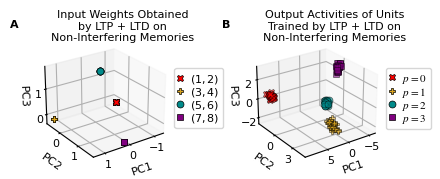

In [17]:

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

colors = ["k", "red", "#red", "#Daa520", "#Daa520", "#008b8b", "#008b8b", "purple", "purple"]
symbols = [".","X", "X", "P", "P", "o", "o", "s", "s"]

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

papersize=(4.33, 1.8)
fig = plt.figure(figsize=papersize)
    
ax1 = fig.add_subplot(1,2,1, projection="3d", zorder=-1)
ax1.text2D(-0.2,1.05, "A", va="bottom", weight="bold", transform=ax1.transAxes, fontsize=8)
ax1.text2D(0.65,1.075, "Input Weights Obtained\nby LTP + LTD on\nNon-Interfering Memories", va="center", ha="center", transform=ax1.transAxes, fontsize=8)

ax1.set_xlabel("$PC1$", fontsize=8, labelpad=-9)
ax1.set_ylabel("$PC2$", fontsize=8, labelpad=-9)
ax1.set_zlabel("$PC3$", fontsize=8, labelpad=-12)
# ax1.set_yticks((-3,0,3))
# ax1.set_zticks((-3,0,3))
# ax1.set_ylim((-3.5,3.5))
ax1.tick_params(labelsize=8, pad=-1)
ax1.xaxis.set_tick_params(pad=-5)
ax1.yaxis.set_tick_params(pad=-5)
ax1.zaxis.set_tick_params(pad=-5)
for idx in range(100):
    ax1.plot(w_LTD_sep_pca[idx, 0], w_LTD_sep_pca[idx,1], w_LTD_sep_pca[idx,2], symbols[np.argsort(w_LTD_sep, axis=1)[idx,-2]], alpha=0.6, ms=5, markeredgewidth=0.5,
             c=colors[np.argsort(w_LTD_sep, axis=1)[idx,-2]],  mec='k')
ax1.view_init(elev=25., azim=55)



colors2_y = ["red", "#Daa520", "#008b8b", "purple"]
symbols_y = ["X", "P", "o", "s"]

ax2 = fig.add_subplot(1,2,2, projection="3d", zorder=-1)
ax2.text2D(-0.2,1.05, "B", va="bottom", weight="bold", transform=ax2.transAxes, fontsize=8)
ax2.text2D(0.65,1.075, "Output Activities of Units\nTrained by LTP + LTD on\nNon-Interfering Memories", va="center", ha="center", transform=ax2.transAxes, fontsize=8)

ax2.set_xlabel("$PC1$", fontsize=8, labelpad=-10)
ax2.set_ylabel("$PC2$", fontsize=8, labelpad=-9)
ax2.set_zlabel("$PC3$", fontsize=8, labelpad=-11)
ax2.set_yticks((-3,0,3))
ax2.tick_params(labelsize=8, pad=-1)
ax2.zaxis.set_tick_params(pad=-4)
ax2.yaxis.set_tick_params(pad=-4.5)
ax2.xaxis.set_tick_params(pad=-5)

for idx in range(100):
    ax2.plot(y_LTD_sep_pca[idx, 0], y_LTD_sep_pca[idx,1], y_LTD_sep_pca[idx,2], symbols_y[labels4train[idx]], alpha=0.6, ms=5,  markeredgewidth=0.5,
             c=colors2_y[labels4train[idx]], mec='k')
ax2.view_init(elev=25., azim=55)


plt.subplots_adjust(left=0.075,
                    bottom=0.0, 
                    right=1-0.13, 
                    top=1-0.1, 
                    wspace=0.6, 
                    hspace=0)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=symbols[1], ms=5, lw=0, markeredgewidth=0.5, color=colors[1], label="$\it p = 0$", mec='k'),
    Line2D([0], [0], marker=symbols[3], ms=5, lw=0, markeredgewidth=0.5, color=colors[3], label='$\it p = 1$', mec='k'),
    Line2D([0], [0], marker=symbols[5], ms=5, lw=0, markeredgewidth=0.5, color=colors[5], label='$\it p = 2$', mec='k'),
    Line2D([0], [0], marker=symbols[7], ms=5, lw=0, markeredgewidth=0.5, color=colors[7], label='$\it p = 3$', mec='k')
]
ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 0.8), fontsize=8, 
           borderpad=0.4, labelspacing=0, handlelength=0.2)


legend_elements = [
    Line2D([0], [0], marker=symbols[1], ms=5, lw=0, markeredgewidth=0.5, color=colors[1], label="$(1,2)$", mec='k'),
    Line2D([0], [0], marker=symbols[3], ms=5, lw=0, markeredgewidth=0.5, color=colors[3], label='$(3,4)$', mec='k'),
    Line2D([0], [0], marker=symbols[5], ms=5, lw=0, markeredgewidth=0.5, color=colors[5], label='$(5,6)$', mec='k'),
    Line2D([0], [0], marker=symbols[7], ms=5, lw=0, markeredgewidth=0.5, color=colors[7], label='$(7,8)$', mec='k')
]
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 0.8), fontsize=8, 
           borderpad=0.4, labelspacing=0, handlelength=0.2)


plt.savefig("FigS03.pdf")

In [18]:
np.mean(y_LTP[labels4train == 0], axis=0).shape

(100,)